# Optimization for Machine learning, Visualizations and results

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# set seaborne style
sns.set_context("paper")
sns.set_style("white")

#### Useful functions

In [14]:
##### plot accuracies over time of a dataframe
def plot_time(dataframe,label):
    
    
    return sns.lineplot(x=[0] + list(np.cumsum(dataframe["time"])) , y = [0]+ list(dataframe["accuracy"]), label = label)
    
# plot accuracies over time of a dataframe while specifying color
def plot_time_2(dataframe,label, color):
    
    
    return sns.lineplot(x=[0] + list(np.cumsum(dataframe["time"])) , y = [0]+ list(dataframe["accuracy"]), label = label, color = color)

# plot losses over time of a dataframe
def plot_losses(dataframe,label):
    
    
    return sns.lineplot(x=list(np.cumsum(dataframe["time"])) , y =list(dataframe["loss"]), label = label)
    
    

# Visualize Test accuracy for minibatch and large batches

#### Loading no gwarmup no lr scaling results

In [15]:
# load arrays that contains results of model training without gradual warmup/lr scaling.
df_4 = pd.read_csv('dataOPTML/results_small_batches_4.csv', sep ='\t',index_col = 0)
df_8 = pd.read_csv('dataOPTML/results_small_batches_8.csv', sep ='\t',index_col = 0)
df_16 = pd.read_csv('dataOPTML/results_small_batches_16_32.csv', sep ='\t',index_col = 0)[:50]
df_32 = pd.read_csv('dataOPTML/results_small_batches_16_32.csv', sep ='\t',index_col = 0)[50:]
df_128 = pd.read_csv('dataOPTML/results_large_batches_128.csv', sep ='\t',index_col = 0)[:100]
df_256 = pd.read_csv('dataOPTML/results_large_batches_256.csv', sep ='\t',index_col = 0)
df_512 = pd.read_csv('dataOPTML/results_large_batches_512.csv', sep ='\t',index_col = 0)
df_1024 = pd.read_csv('dataOPTML/results_large_batches_1024.csv', sep ='\t',index_col = 0)
df_2048 = pd.read_csv('dataOPTML/results_large_batches_2048.csv', sep ='\t',index_col = 0)

# Aggregate all arrays in the same df
step_2_df = pd.concat([df_4,df_8,df_16,df_32,df_128,df_256,df_512,df_1024,df_2048])


In [16]:
# loading lr scaling results
df_128_adj = pd.read_csv('dataOPTML/results_large_batches_128_w_lr_adj.csv', sep ='\t',index_col = 0)
df_256_adj = pd.read_csv('dataOPTML/results_large_batches_256_w_lr_adj.csv', sep ='\t',index_col = 0)
df_512_adj = pd.read_csv('dataOPTML/results_large_batches_512_w_lr_adj.csv', sep ='\t',index_col = 0)
df_1024_adj = pd.read_csv('dataOPTML/results_large_batches_1024_w_lr_adj.csv', sep ='\t',index_col = 0)
df_2048_adj = pd.read_csv('dataOPTML/results_large_batches_2048_w_lr_adj.csv', sep ='\t',index_col = 0)

step_3_df = pd.concat([df_256_adj,df_512_adj,df_1024_adj,df_2048_adj])



In [17]:
# loading graduam warmup results
df_128_wlr = pd.read_csv('dataOPTML/results_large_batches_wlr_128.csv', sep ='\t',index_col = 0)
df_256_wlr = pd.read_csv('dataOPTML/results_large_batches_wlr_256.csv', sep ='\t',index_col = 0)
df_512_wlr = pd.read_csv('dataOPTML/results_large_batches_wlr_512.csv', sep ='\t',index_col = 0)
df_1024_wlr = pd.read_csv('dataOPTML/results_large_batches_wlr_1024.csv', sep ='\t',index_col = 0)
df_2048_wlr = pd.read_csv('dataOPTML/results_large_batches_wlr_2048.csv', sep ='\t',index_col = 0)

step_4_df = pd.concat([df_128_wlr,df_256_wlr,df_512_wlr,df_1024_wlr,df_2048_wlr])


#### Results

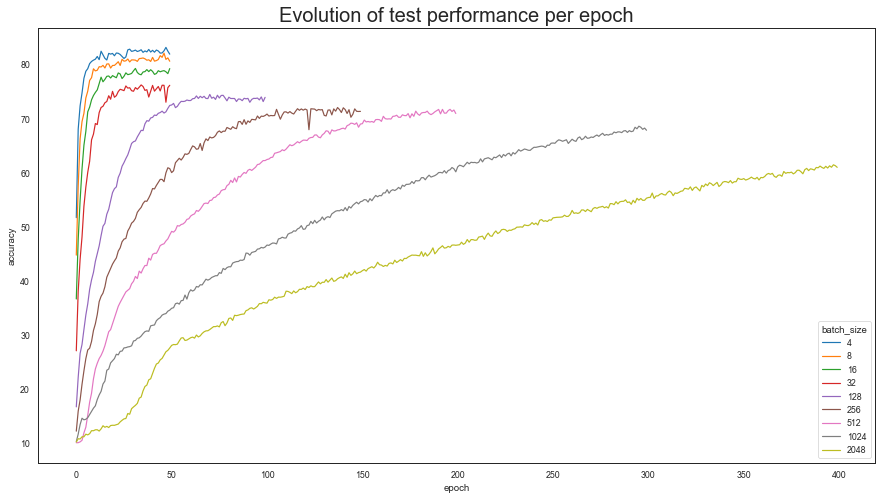

In [18]:
# Evolution of test performance per epoch
plt.figure(figsize=(15,8))
g = sns.lineplot(data=step_2_df, x="epoch", y = "accuracy", hue = "batch_size", palette = "tab10")
plt.title("Evolution of test performance per epoch", fontsize = 20)
plt.savefig('test_by_epoch_step2.jpg');

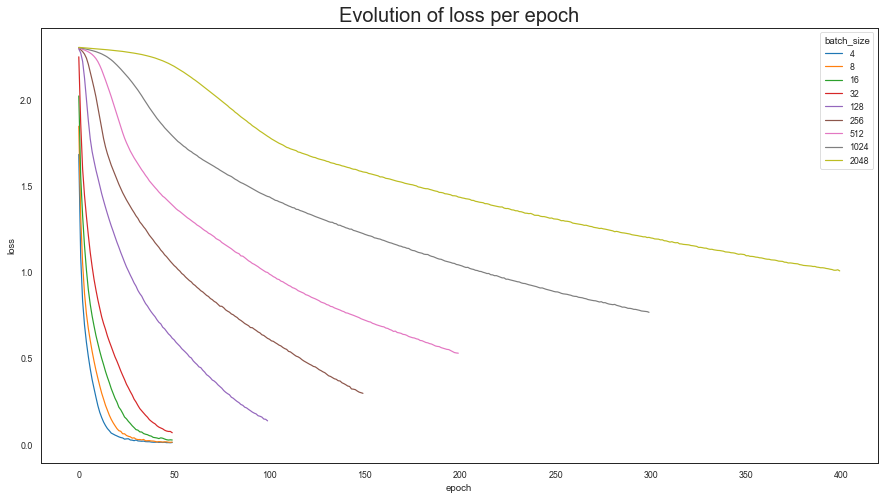

In [19]:
# Evolution of loss per epoch
plt.figure(figsize=(15,8))
g = sns.lineplot(data=step_2_df, x="epoch", y = "loss", hue = "batch_size", palette = "tab10")
plt.title("Evolution of loss per epoch", fontsize = 20);

In [20]:
# calculate max accuracy reached for each batch size
step_2_df.groupby(by="batch_size").max('accuracy')['accuracy']

batch_size
4       83.14
8       82.07
16      79.25
32      76.20
128     74.44
256     72.02
512     71.68
1024    68.57
2048    61.43
Name: accuracy, dtype: float64

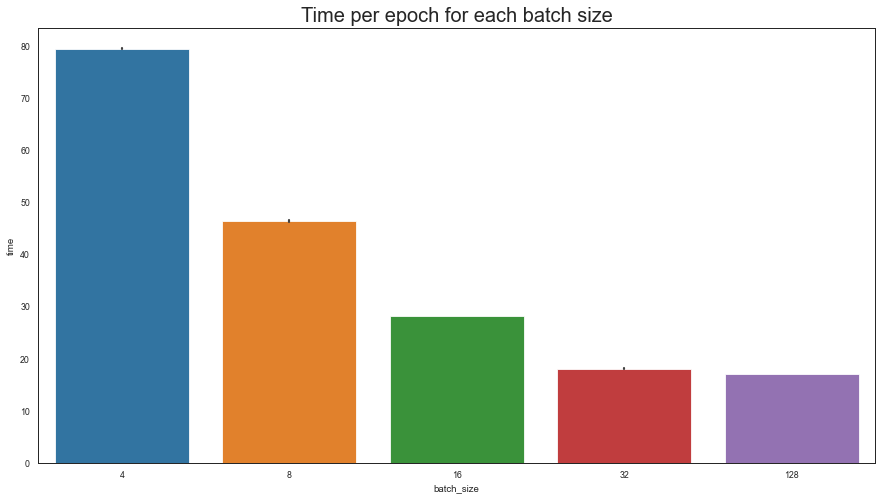

In [21]:
# Plot time per epoch for each batch size
step_2_df_bis = pd.concat([df_4,df_8,df_16,df_32,df_128])

plt.figure(figsize=(15,8))
g = sns.barplot(data=step_2_df_bis, x="batch_size", y = "time", palette = "tab10")

plt.title("Time per epoch for each batch size", fontsize = 20)
plt.savefig('time per epoch.jpg');

In [22]:
# get the time it takes to go over each epoch for a given batch size
step_2_df.groupby('batch_size').mean()['time']

batch_size
4       79.492431
8       46.419082
16      28.176002
32      18.028011
128     16.963255
256     16.231619
512     15.881256
1024    16.595985
2048    17.263298
Name: time, dtype: float64

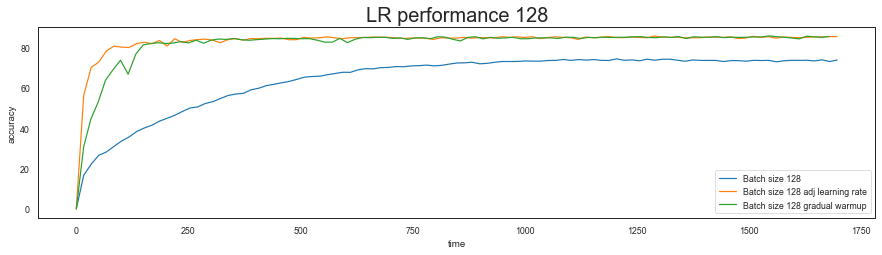

In [25]:
# LR performance for 128
plt.figure(figsize=(15,3.5))
plt.title("LR performance 128", fontsize = 20)
plt.xlabel("time")
plt.ylabel("accuracy")


plot_time(df_128, "Batch size 128")
plot_time(df_128_adj,"Batch size 128 adj learning rate")
plot_time(df_128_wlr,"Batch size 128 gradual warmup")


plt.savefig('128_warmup_and_adj')

plt.show()

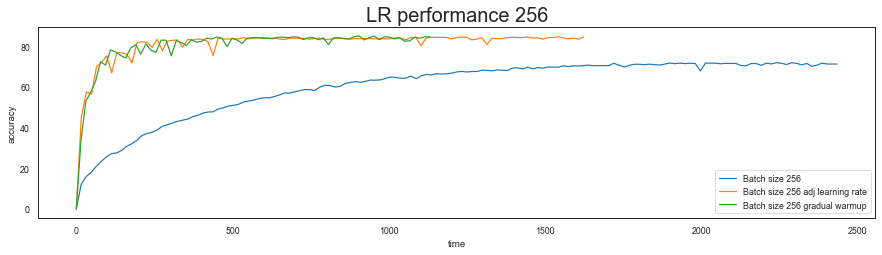

In [26]:
# LR performance for 256
plt.figure(figsize=(15,3.5))
plt.title("LR performance 256", fontsize = 20)
plt.xlabel("time")
plt.ylabel("accuracy")


plot_time(df_256, "Batch size 256")
plot_time(df_256_adj,"Batch size 256 adj learning rate",)
plot_time(df_256_wlr,"Batch size 256 gradual warmup",)


plt.savefig('256_warmup_and_adj')

plt.show()

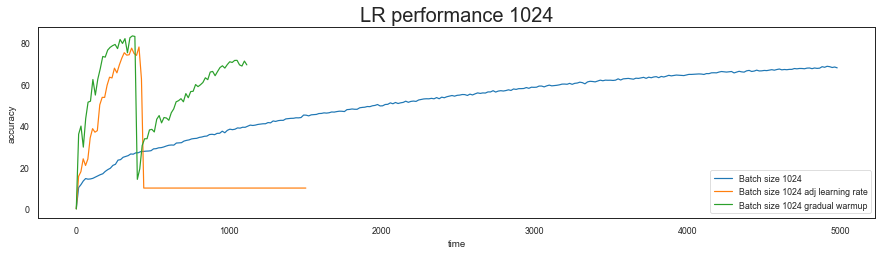

In [27]:
# LR performance 1024
plt.figure(figsize=(15,3.5))
plt.title("LR performance 1024", fontsize = 20)
plt.xlabel("time")
plt.ylabel("accuracy")


plot_time(df_1024, "Batch size 1024")
plot_time(df_1024_adj,"Batch size 1024 adj learning rate")
plot_time(df_1024_wlr,"Batch size 1024 gradual warmup")


plt.savefig('1024_warmup_and_adj')

plt.show()

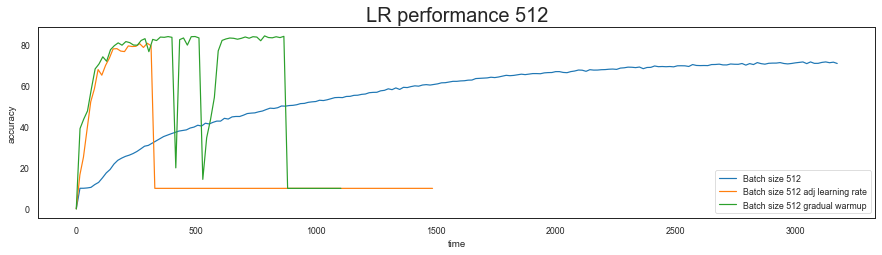

In [28]:
# LR performance 512
plt.figure(figsize=(15,3.5))
plt.title("LR performance 512", fontsize = 20)
plt.xlabel("time")
plt.ylabel("accuracy")


plot_time(df_512, "Batch size 512")
plot_time(df_512_adj,"Batch size 512 adj learning rate")
plot_time(df_512_wlr,"Batch size 512 gradual warmup")


plt.savefig('512_warmup_and_adj')

plt.show()

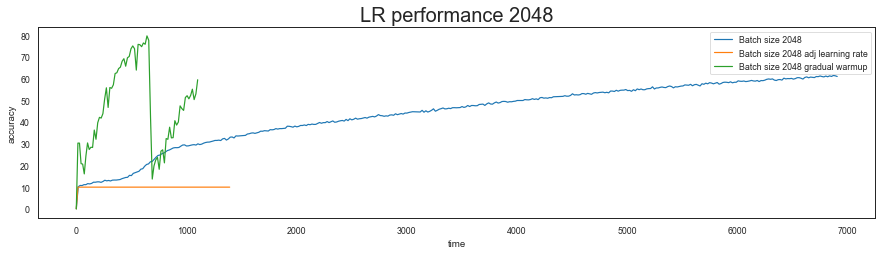

In [29]:
# LR performance 2048
plt.figure(figsize=(15,3.5))
plt.title("LR performance 2048", fontsize = 20)
plt.xlabel("time")
plt.ylabel("accuracy")


plot_time(df_2048, "Batch size 2048")
plot_time(df_2048_adj,"Batch size 2048 adj learning rate")
plot_time(df_2048_wlr,"Batch size 2048 gradual warmup")


plt.savefig('2048_warmup_and_adj')

plt.show()

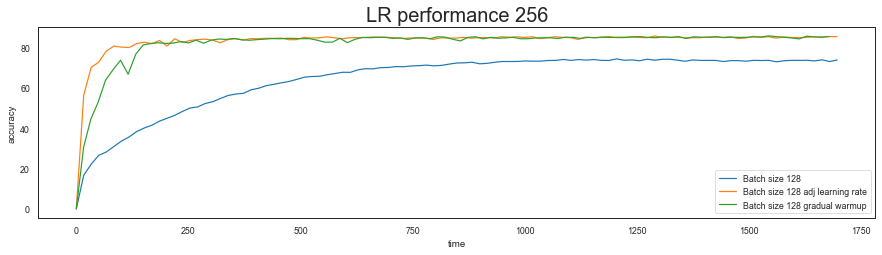

In [31]:
#LR performance 256
plt.figure(figsize=(15,3.5))
plt.title("LR performance 256", fontsize = 20)
plt.xlabel("time")
plt.ylabel("accuracy")


plot_time(df_128, "Batch size 128")
plot_time(df_128_adj,"Batch size 128 adj learning rate")
plot_time(df_128_wlr,"Batch size 128 gradual warmup")


plt.savefig('256_warmup_and_adj')

plt.show()

# Step 4: Gradual Warmup

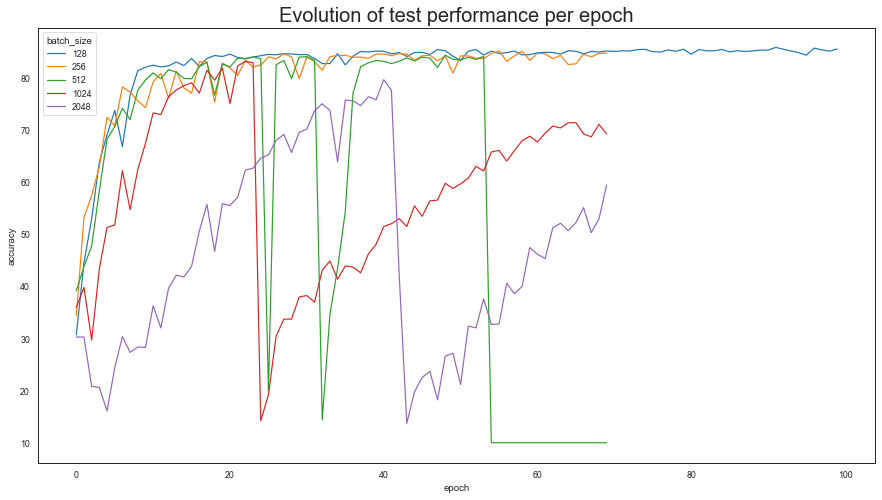

In [32]:
# test performance by epoch 
plt.figure(figsize=(15,8))
g = sns.lineplot(data=step_4_df, x="epoch", y = "accuracy", hue = "batch_size", palette = "tab10")
plt.title("Evolution of test performance per epoch", fontsize = 20);

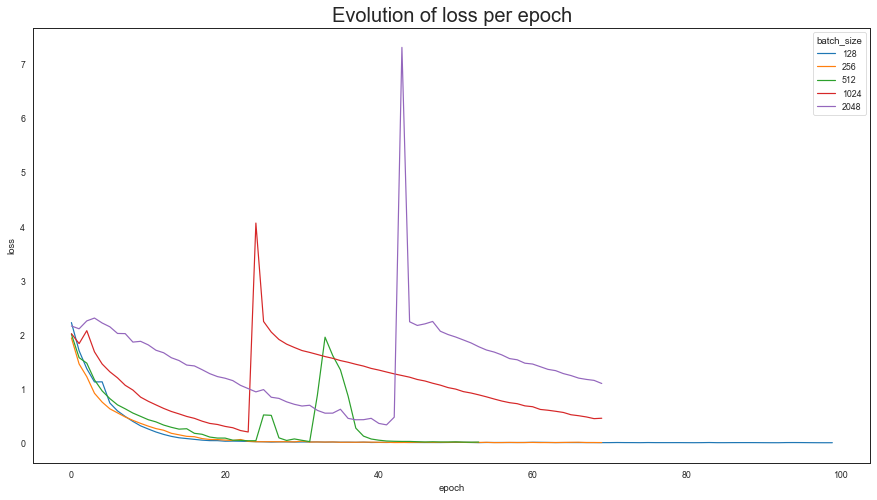

In [144]:
# loss per epoch
plt.figure(figsize=(15,8))
g = sns.lineplot(data=step_4_df, x="epoch", y = "loss", hue = "batch_size", palette = "tab10")
plt.title("Evolution of loss per epoch", fontsize = 20);
plt.savefig("loss_large_batches")